In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time 

#to keep things in order, and to avoid to copy and paste everytime our functions if we want to use them in more than one folder,
#we can temporarily use this library. 
import sys

#in this way Python will search the implementations also in the path '../HelperFunctions'
sys.path.insert(0, '../HelperFunctions')
sys.path.insert(0, '../pre-processing/Clean_Data/')

from proj1_helpers import *
from common_functions import *
from counters import *
from remove import *
from replace import *
from regressors import *

# Loading data

In [2]:
yb, input_data, ids = load_csv_data("../data/train.csv", sub_sample=False)
_, test_data, ids_test = load_csv_data("../data/test.csv", sub_sample=False)

#this will surely be deleted, in this way we are sure that original_data is the original version of the data and we don't have
#to load them again
from copy import deepcopy
originalData = deepcopy(input_data)
originalY = deepcopy(yb)
print(yb)

# change the label of -1 to 0 for simplicity. 
idx_wrong=np.where(yb==-1)
print(idx_wrong)
yb[idx_wrong]=0
print(yb)

[ 1. -1. -1. ...  1. -1. -1.]
(array([     1,      2,      3, ..., 249996, 249998, 249999]),)
[1. 0. 0. ... 1. 0. 0.]


# Pre-processing

### Removing the columns with bad data and standardization

In [3]:
input_data = deepcopy(originalData)
y = deepcopy(originalY)
print(input_data.shape)
print(y.shape)
# Stocking the indexes of columns to remove
idxCols = np.where(countInvalid(input_data,-999)>0)[0]
input_data=removeColumns(input_data,0)
print(input_data.shape)
input_data,_,_ = standardize(input_data)

(250000, 30)
(250000,)
(250000, 19)


### Same pre-processing applied on test dataset

In [4]:
print(test_data.shape)
# To remove the same data we removed from the train set.
test_data=np.delete(test_data,idxCols,axis=1)
print(test_data.shape)
test_data,_,_ = standardize(test_data)

(568238, 30)
(568238, 19)


### Just replacing the invalid values with 0 and standardizing

In [ ]:
idxCols=np.where(countInvalid(input_data,-999)>0)[0]

#Replacing with 0 all the bad values in the train set (-999)
input_data=replaceWithZero(input_data,-999,idxCols)
input_data,_,_=standardize(input_data)
print('Size of the train set :', input_data.shape)

### Same on the test set

In [ ]:
#Replacing with 0 all the bad values in the test set (-999)

# If I use the same idxCols, it means that we replace with 0 the invalide values in the colums containing invalid 
# values in the train set. What if there are other invalid values in other columns? Should we replace them too? Or it 
# would be not consistent?
test_data=replaceWithZero(test_data,-999,idxCols)
test_data,_,_=standardize(test_data)
print('Size of the test set :', test_data.shape)

# PCA

In [ ]:
#Generating the principal components
sys.path.insert(0, '../pre-processing/PCA/')
from pca_functions import PCAWithCovariance

input_data,_,_ = standardize(input_data)
test_data,_,_ = standardize(test_data)

_,eV = PCAWithCovariance(input_data)

N = 7 #num p. components
components = np.empty(input_data.shape[0])
for i in range(N):
    components = np.c_[components, input_data.dot(eV[:,i])]
    
print(components.shape)
print(components[:,0])
input_data=components[:,1:]
#input_data = np.c_[np.ones(input_data.shape[0]), components]
print(input_data.shape)
print(input_data[:,0])
print(input_data[:,1])

### PCA applied on test dataset

In [ ]:
N = 7 #num p. components
components = np.empty(test_data.shape[0])
for i in range(N):
    components = np.c_[components, test_data.dot(eV[:,i])]
test_data=components[:,1:]
#test_data = np.c_[np.ones(test_data.shape[0]), components]

# Regression

### - Gradient Descent

#### Creation of the model

In [ ]:
# Using Gradient-Descent regressor

max_iters=100
#With gamma = 0.7 loss huuuuge
gamma=0.01

w_initial=np.array(np.zeros(input_data.shape[1]))

#Start
GD_loss,GD_ws= gradient_descent(yb,input_data,w_initial,max_iters,gamma)

#Print results
print("Gradient Descent final loss =",  GD_loss)
print("Weights =",GD_ws)

#### Prediction

In [ ]:
# Predicting the labels of test dataset.
GD_labels=predict_labels(GD_ws,test_data)
print(GD_labels)

create_csv_submission(ids_test,GD_labels,'predictions_GD_PCA.csv')
print('Prediction file created')

### - Stochastic Gradient Descent

#### Creation of the model

In [ ]:
# Using Stochastic Gradient Descent regressor

max_iters=100
#With gamma = 0.7 loss huuuuge
gamma=0.01
batch_size=32

w_initial=np.array(np.zeros(input_data.shape[1]))

#Start
SGD_loss,SGD_ws= stochastic_gradient_descent(yb,input_data,w_initial,batch_size,max_iters,gamma)

#Print results
print("Stochastic Gradient Descent final loss =",  SGD_loss)
print("Weights =",SGD_ws)

#### Prediction

In [ ]:
# Predicting the labels of test dataset.
SGD_labels=predict_labels(SGD_ws,test_data)
print(SGD_labels)

create_csv_submission(ids_test,SGD_labels,'predictions_SGD_PCA.csv')
print('Prediction file created')

### - Polynomial least squares

#### Creation of the model

Processing 1th experiment, degree=1, rmse_tr=0.41999782756625104, rmse_vt=0.41918971897694357
Processing 2th experiment, degree=2, rmse_tr=0.40898302383463797, rmse_vt=0.4082423424354378
Processing 3th experiment, degree=3, rmse_tr=0.40389554533581346, rmse_vt=0.4038737289097868
Processing 4th experiment, degree=4, rmse_tr=0.40094698291355324, rmse_vt=0.4024192619983078
Processing 5th experiment, degree=5, rmse_tr=0.39895845168591126, rmse_vt=0.39972961046821265
Processing 6th experiment, degree=6, rmse_tr=0.39779453723783215, rmse_vt=0.39819742948814574
Processing 7th experiment, degree=7, rmse_tr=0.3970862429522391, rmse_vt=0.39800257587389043
Processing 8th experiment, degree=8, rmse_tr=0.3950564283903245, rmse_vt=0.4597594482150059


Text(0.5,1,'Variation of the loss on the validation test depending on the degree of features expansion.')

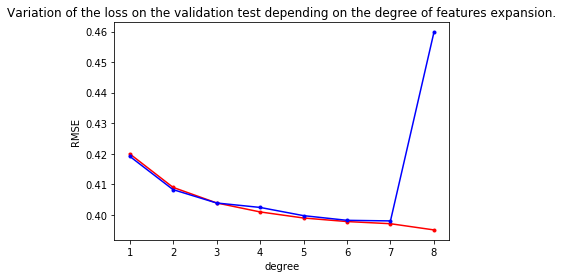

In [5]:
# Using least squares with expanded features

# We divide the set in 80% training and 20% test. This is done in order to obtain a loss on a small validation in test 
# to guess which is the best degree of expansion. 
# --> A better way to do this is of course Cross Validation (to implement)
# --> Note that we did not perform randomization before dividing. Of course it would be better to do so, but our data do not look to be ordered anyway. 

ratio = 0.8
seed = 9
input_data_tr,validation_data,yb_tr,yb_vt=split_data(input_data,yb,ratio,seed)

degrees = np.array([1,2,3,4,5,6,7,8])
losses_vt = []
losses_tr = []
ws = []

for ind, degree in enumerate(degrees):
    # form dataset to do polynomial regression.
    tx = build_poly(input_data_tr, degree)
    #Note that the column of ones is already added by the function build_poly()

    # least squares
    weights = least_squares(yb_tr, tx)
    ws.append(weights)
    
    # Expanding the validation set
    val_data = build_poly(validation_data,degree)
    
    # compute RMSE on the validation set
    rmse_tr = np.sqrt(2 * compute_loss_MSE(yb_tr, tx, weights))
    rmse_vt = np.sqrt(2 * compute_loss_MSE(yb_vt, val_data, weights))
    losses_tr.append(rmse_tr)
    losses_vt.append(rmse_vt)
    print("Processing {i}th experiment, degree={d}, rmse_tr={loss_tr}, rmse_vt={loss_vt}".format(
          i = ind + 1, d=degree, loss_tr=rmse_tr, loss_vt=rmse_vt))
    
plt.plot(degrees,losses_tr, marker=".", color='r')
plt.plot(degrees,losses_vt, marker=".", color='b')
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.title("Variation of the loss on the validation test depending on the degree of features expansion.")

In [6]:
# Thus, it looks like the best model is obtained with degree=4 (with no PCA)

# We train again our model using all the data of the train set

#CHANGE THE DEGREE WHEN NEEDED.
degree=7
tx = build_poly(input_data, degree)
LS_ws = least_squares(yb, tx)
print(LS_ws.shape)

(134,)


#### Prediction

In [7]:
# Predicting the labels of test set.
test_data_expanded=build_poly(test_data,degree)
LS_labels=predict_labels(LS_ws,test_data_expanded)
print(LS_labels)

# CHANGE THE NAME OF THE FILE.
create_csv_submission(ids_test,LS_labels,'predictions_LS_ColRem_noPCA.csv')
print('Prediction file created')

[1. 1. 1. ... 1. 1. 1.]
Prediction file created


### - Ridge Regression

#### Creation of the model

Processing 1th experiment, rmse_tr=0.3970872434519869, rmse_vt=0.3980015627304315
Processing 2th experiment, rmse_tr=0.39708748133956456, rmse_vt=0.39800031680998943
Processing 3th experiment, rmse_tr=0.3970885106815315, rmse_vt=0.39799798928545227
Processing 4th experiment, rmse_tr=0.3970923536293025, rmse_vt=0.3979945465673787
Processing 5th experiment, rmse_tr=0.3971044354532632, rmse_vt=0.3979914442601199
Processing 6th experiment, rmse_tr=0.3971394115671734, rmse_vt=0.3979965551091056
Processing 7th experiment, rmse_tr=0.3972411149496561, rmse_vt=0.39804459485071186
Processing 8th experiment, rmse_tr=0.39752024064371094, rmse_vt=0.39824320163431925
Processing 9th experiment, rmse_tr=0.3982131717583865, rmse_vt=0.3988501524449136
Processing 10th experiment, rmse_tr=0.3997087767388092, rmse_vt=0.400316124582042
Processing 11th experiment, rmse_tr=0.40228549296853766, rmse_vt=0.4030009463310095
Processing 12th experiment, rmse_tr=0.4059387743357645, rmse_vt=0.4069170138292207
Process

Text(0.5,1,'comparison between the loss on the validation and training sets depending on lambda (regularization parameter).')

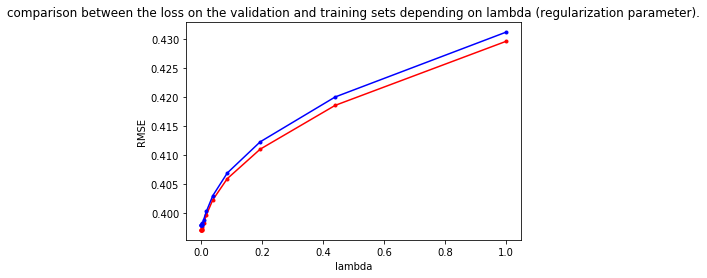

In [8]:
# Using Ridge regression with expanded features

# We divide the set in 80% training and 20% test. This is done in order to obtain a loss on a small validation in test 
# to guess which is the best degree of expansion. 
# --> A better way to do this is of course Cross Validation (to implement)
# --> Note that we did not perform randomization before dividing. Of course it would be better to do so, but our data do not look to be ordered anyway. 

ratio=0.8
seed=9
input_data_tr,validation_data,yb_tr,yb_vt=split_data(input_data,yb,ratio,seed)
# Parameters
degrees=np.array([1,2,3,4,5,6,7,8])
degree=7
lambdas = np.logspace(-5, 0, 15)
loss_vt = []
loss_tr = []
ws = []

for ind, lambda_ in enumerate(lambdas):
    # form dataset to do polynomial regression.
    tx = build_poly(input_data_tr, degree)
    #Note that the column of ones is already added by the function build_poly()

    # least squares
    weights = ridge_regression(yb_tr, tx, lambda_)
    ws.append(weights)
    
    # Expanding the validation set
    val_data=build_poly(validation_data,degree)
    
    # compute RMSE on the train set and the validation set
    rmse_tr= np.sqrt(2 * compute_loss_MSE(yb_tr, tx, weights))
    rmse_vt= np.sqrt(2 * compute_loss_MSE(yb_vt, val_data, weights))
    loss_tr.append(rmse_tr)
    loss_vt.append(rmse_vt)
    print("Processing {i}th experiment, rmse_tr={loss_tr}, rmse_vt={loss_vt}".format(
          i=ind + 1, loss_tr=rmse_tr, loss_vt=rmse_vt))
    
plt.plot(lambdas,loss_tr,marker=".", color='r')
plt.plot(lambdas,loss_vt, marker=".", color='b')
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("comparison between the loss on the validation and training sets depending on lambda (regularization parameter).")

In [13]:
# Thus, it looks like the best model is obtained with degree=4 (with no PCA)

# We train again our model using all the data of the train set
#CHANGE THE DEGREE WHEN NEEDED.
degree=7
print(lambdas[1])
lambda_=lambdas[1]
tx = build_poly(input_data, degree)
RR_ws = ridge_regression(yb, tx, lambda_)
print(RR_ws.shape)

2.2758459260747865e-05
(134,)


#### Prediction

In [14]:
# Predicting the labels of test set.
test_data_expanded=build_poly(test_data,degree)
RR_labels=predict_labels(RR_ws,test_data_expanded)
print(RR_labels)

# CHANGE THE NAME OF THE FILE.
create_csv_submission(ids_test,RR_labels,'predictions_RR_ColRem_noPCA.csv')
print('Prediction file created')

[-1.  1.  1. ...  1.  1.  1.]
Prediction file created
